##### NLPK(Natural Language Toolkit) : 자연어 처리 및 문서 분석용 패키지

##### 말 뭉치(corpus), 토큰(token) 생성, 형태소 분석(어근, 어미), 품사 태깅
<br/>

---

### 데이터 마이닝 vs 텍스트 마이닝
1. 데이터 마이닝
  - 데이터에서 의미 있는 정보를 찾아내는 기능
  - 통계분석, 모델링 기법을 이용하여 데이터 안 패턴과의 관계를 찾아내는 과정
2. 텍스트 마이닝
  - 비정형 텍스트 데이터에서 분석 도구 이용하여 패턴을 찾아 정보를 만드는 기술
  - 비정형 데이터를 정형화된 데이터로 정량화하는 과정
  - 자연어 처리 기술에 기반을 둔 텍스트로 데이터를 가공하는 기술

In [1]:
# 말뭉치(corpus) : 자연어 분석 작업을 수행하기 위해 만들어진 샘플 문서 집합
import nltk
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
# 저작권이 만료된 문학작품을 포함하고 있는 말뭉치
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [5]:
# Token 생성 
# 긴 문자열을 분석하기 위해 나눈 작은 단위
# tokenizer : 토큰생성함수 -> 문자열을 토큰 단위로 나누어 리스트로 반환
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [6]:
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [7]:
from nltk.tokenize import RegexpTokenizer
pat = RegexpTokenizer("[\w]+")
print(pat.tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']


##### Morpheme(형태소) : 의미가 있는 가장 작은 말의 단위
- 형태소 분석 : 단어로부터 어근, 접두사, 접미사, 품사... 속성을 파악
- Stemming(어간 추출), lemmatizing(원형 복원), pos tagging(품사 부착)

In [8]:
# 어간 추출 (stemming) : 접미사나 어미를 제거하여 기본형을 찾는 방법
# PoterStemmer, LancasterStemmer
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flys', 'flying', 'flew', 'flown']

print("PorterStemmer :", [st1.stem(w) for w in words])
print("LancasterStemmer :", [st2.stem(w) for w in words])

PorterStemmer : ['fli', 'fli', 'fli', 'flew', 'flown']
LancasterStemmer : ['fly', 'fly', 'fly', 'flew', 'flown']


In [9]:
# 원형 복원(lemmatizing) : 사전형으로 통일하는 작업
# 품사 Part of Speech, pos를 지정하면 더 정확한 원형을 찾는다
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos='v') for w in words] # pos=(품사)

['fly', 'fly', 'fly', 'fly', 'fly']

In [10]:
# 품사 부착(pos tagging)
# NNP(단수 고유명사), VB(동사), VBP(현재진행동사), NN(명사) 등
# 품사 설명
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [11]:
from nltk.tag import pos_tag
sentence = "Her mother had died too long ago for her to have more than an indistinct remembrance of her caresses"
tag_list = pos_tag(word_tokenize(sentence))
tag_list

[('Her', 'PRP$'),
 ('mother', 'NN'),
 ('had', 'VBD'),
 ('died', 'VBN'),
 ('too', 'RB'),
 ('long', 'RB'),
 ('ago', 'RB'),
 ('for', 'IN'),
 ('her', 'PRP$'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('an', 'DT'),
 ('indistinct', 'JJ'),
 ('remembrance', 'NN'),
 ('of', 'IN'),
 ('her', 'PRP$'),
 ('caresses', 'NNS')]

In [12]:
nouns_list = [t[0] for t in tag_list if t[1] == 'NN']
nouns_list

['mother', 'remembrance']

In [13]:
from nltk.tag import untag
untag(tag_list)

['Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses']

In [14]:
def tokenizer(doc):
    return ['/'.join(p) for p in tag_list]

tokenizer(sentence)

['Her/PRP$',
 'mother/NN',
 'had/VBD',
 'died/VBN',
 'too/RB',
 'long/RB',
 'ago/RB',
 'for/IN',
 'her/PRP$',
 'to/TO',
 'have/VB',
 'more/JJR',
 'than/IN',
 'an/DT',
 'indistinct/JJ',
 'remembrance/NN',
 'of/IN',
 'her/PRP$',
 'caresses/NNS']

In [16]:
# Text 클래스
from nltk import Text

text = Text(pat.tokenize(emma_raw))

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

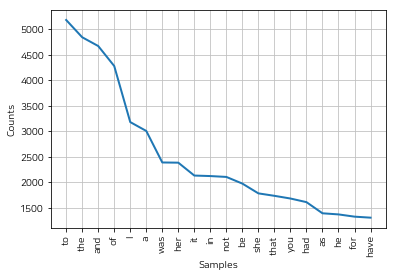

In [18]:
text.plot(20)
plt.show()

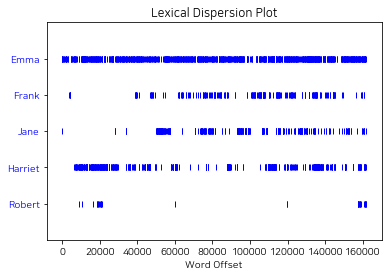

In [19]:
# 단어가 사용된 위치를 시각화
text.dispersion_plot(['Emma', 'Frank', 'Jane', 'Harriet', 'Robert'])

In [20]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [21]:
text.similar('Emma')

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [22]:
text.common_contexts(['Emma', 'she'])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


In [23]:
# FreqDist : 문서에 사용된 단어(토큰) 사용빈도에 대한 정보를 담는 클래스
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [24]:
# 불용어(stop words) : 빈번하게 사용되지만, 구체적인 의미를 찾기 어려운 단어
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
words = ['justice', 'the', 'a', 'all', 'or', 'roberts', 'not']
# 불용어를 제거한 리스트
print([w for w in words if not w in stopwords.words('english')])

['justice', 'roberts']


In [27]:
from nltk import FreqDist
# nltk 말뭉치
#emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
# 토큰생성
emma_token = pos_tag(pat.tokenize(emma_raw))

# 별도의 불용어
stopwords = ['Mr', 'Mrs', 'Miss', 'Dr', 'Dear']

# NNP
names_list = [t[0] for t in emma_token if t[1] == 'NNP' and t[0] not in stopwords]

fd_names = FreqDist(names_list)
fd_names

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [28]:
# 전체 단어수
fd_names.N()

7861

In [29]:
fd_names['Emma']

830

In [30]:
#확률
fd_names.freq('Emma')

0.10558453123012339

In [31]:
# 가장 출현 횟수가 높은 단어
fd_names.most_common(10)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

[WordCloud](https://amueller.github.io/word_cloud)

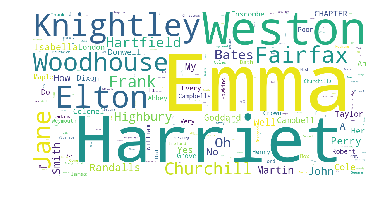

In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=1200, height=600, background_color='white',
              random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

### 한글 자연어 처리 : [KoNLPy](https://konlpy-ko.readthedocs.io/ko/v0.4.3/)
- JAVA기반 -> [JDK설치](https://java.com/ko/download/)
- JType 설치
- KoNLPy 설치
```Bash
pip install konlpy
```

In [1]:
# 한글 형태소 분석기 : 한나눔, 꼬꼬마, ???
from konlpy.tag import Kkma
kkma = Kkma()

In [4]:
kkma.sentences('한국어 분석을 시작하려고 합니다. 정말 어렵네요~~')

['한국어 분석을 시작하려고 합니다.', '정말 어렵네요~~']

In [5]:
kkma.nouns('한국어 분석을 시작하려고 합니다. 정말 어렵네요~~')

['한국어', '분석', '시작']

In [6]:
kkma.pos('한국어 분석을 시작하려고 합니다. 정말 어렵네요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작', 'NNG'),
 ('하', 'XSV'),
 ('려고', 'ECD'),
 ('하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('정말', 'MAG'),
 ('어렵', 'VA'),
 ('네요', 'EFN'),
 ('~~', 'SW')]

In [3]:
# 한나눔 형태소 분석기
from konlpy.tag import Hannanum
han = Hannanum()

In [4]:
han.nouns("한국어 분석을 시작합니다. 재미있어요")

['한국어', '분석', '시작']

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
okt.nouns("한국어 분석을 시작합니다. 재미있어요")

['한국어', '분석', '시작']

In [7]:
okt.morphs("한국어 분석을 시작합니다. 재미있어요")
# 다른 분석기에 비해 조금 더 정확한 편

['한국어', '분석', '을', '시작', '합니다', '.', '재미있어요']

In [8]:
okt.pos("한국어 분석을 시작합니다. 재미있어요")

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('.', 'Punctuation'),
 ('재미있어요', 'Adjective')]

### KoNLPy 라이브러리가 제공하는 형태소 분석기
- Hannanum, Kkma, Komoran, Mecab, Okt(Twitter)
- Okt 에서 제공하는 함수
- morphs() : 텍스트를 형태소 단위로 나누는 함수
  - 옵션 : norm, stem => 기본값 False
- nouns() : 명사만 추출
- phrases() : 어절
- pos() : 형태소와 품사를 리스트 타입으로 반환
  - 옵션 : norm. stem

In [10]:
s = okt.pos('아버지 가방에 들어가신다', norm=True, stem=True)
print(s)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb')]


[국립국어원 언어정보나눔터](https://ithub.korean.go.kr)

In [ ]:
# 한글형태소 분석기를 이용하여 박경리 소설 '토지'에 명사가 얼마나 나오는지 분석
import codecs

fp = codecs.open("D:/python3/data/park_data.txt", 'r', encoding='utf-8')
